Training Data Size:  torch.Size([60000, 28, 28]) - torch.Size([60000])
Testing Data Size:  torch.Size([10000, 28, 28]) - torch.Size([10000])


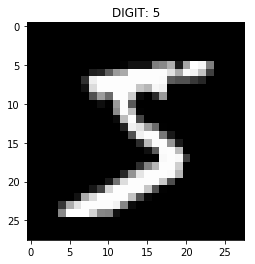

In [237]:
import os
from torchvision import datasets
import torch as th
import matplotlib.pyplot as plt
# Change this to where you want to save the data
SAVE_DIR = os.path.expanduser(os.getcwd()+'/data/MNIST/')
# train data
mnist_train = datasets.MNIST(SAVE_DIR, train=True, download=True)
x_train_mnist, y_train_mnist = mnist_train.train_data.type(th.FloatTensor), mnist_train.train_labels
# test data
mnist_test = datasets.MNIST(SAVE_DIR, train=False, download=True)
x_test_mnist, y_test_mnist = mnist_test.test_data.type(th.FloatTensor), mnist_test.test_labels

train = torch.utils.data.TensorDataset(x_train_mnist.view(-1, 28, 28, 1).permute(0, 3, 1, 2), y_train_mnist.view(-1, 1))
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=False)

test = torch.utils.data.TensorDataset(x_test_mnist.view(-1, 28, 28, 1).permute(0, 3, 1, 2), y_test_mnist.view(-1, 1))
test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)

print('Training Data Size: ' ,x_train_mnist.size(), '-', y_train_mnist.size())
print('Testing Data Size: ' ,x_test_mnist.size(), '-', y_test_mnist.size())

plt.imshow(x_train_mnist[0].numpy(), cmap='gray')
plt.title('DIGIT: %i' % y_train_mnist[0])
plt.show()

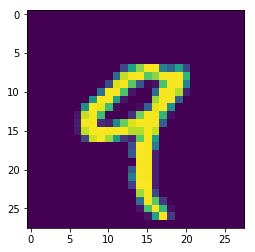

In [4]:
index = 4
x_example = x_train_mnist[index]
plt.imshow(x_example)
plt.show()

In [5]:
import torch.nn.functional as F
# rotation = torch.Tensor([[1/1.0,0],[0, 1/1.0]])
rotation = rot
translation = torch.Tensor([0, 0])
theta = torch.Tensor([[0, 0, 0],[0, 0, 0]])
theta[:2, :2] = rotation
print(theta[:, 2])
theta[:, 2] = translation
theta = theta.view(1, 2, 3)
print(theta)
x_batch = x_example.view(1, 1, 28, 28)
x_flat = x_example.view(1, 28 * 28)
grid = F.affine_grid(theta, x_batch.size())
x = F.grid_sample(x_batch, grid)
plt.imshow(x[0][0])

u, s, v = torch.svd(x[0][0])

NameError: name 'rot' is not defined

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


1959
XBATCH TYPE <class 'torch.Tensor'>
XBATCH SHAPE: torch.Size([1, 1, 28, 28])
U first vec: tensor([0.1112, 0.9938], grad_fn=<SelectBackward>)
U: tensor([[ 0.1112,  0.9938],
        [ 0.9938, -0.1112]], grad_fn=<SvdBackward>)
tensor(0.9938, grad_fn=<SelectBackward>) tensor(0.1112, grad_fn=<SelectBackward>)
tensor([[ 0.1112,  0.9938],
        [ 0.9938, -0.1112]], grad_fn=<SvdBackward>) tensor([[6.2013, 0.0000],
        [0.0000, 3.0624]]) tensor(14.4987, grad_fn=<DivBackward1>) tensor(13.7467, grad_fn=<DivBackward1>)
THETA SHAPE: torch.Size([1, 2, 3])
Results Shape: torch.Size([28, 1])
1908
XBATCH TYPE <class 'torch.Tensor'>
XBATCH SHAPE: torch.Size([1, 1, 28, 28])
U first vec: tensor([0.1541, 0.9881], grad_fn=<SelectBackward>)
U: tensor([[ 0.1541,  0.9881],
        [ 0.9881, -0.1541]], grad_fn=<SvdBackward>)
tensor(0.9881, grad_fn=<SelectBackward>) tensor(0.1541, grad_fn=<SelectBackward>)
tensor([[ 0.1541,  0.9881],
        [ 0.9881, -0.1541]], grad_fn=<SvdBackward>) tensor([[5.7040, 

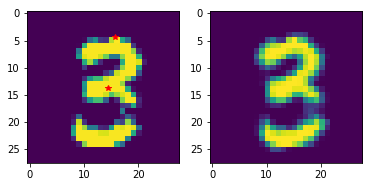

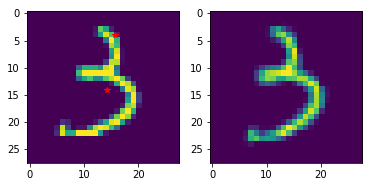

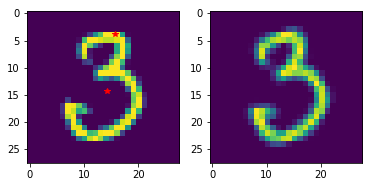

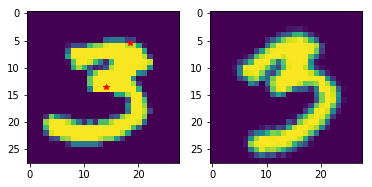

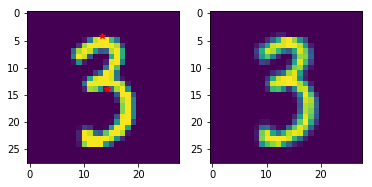

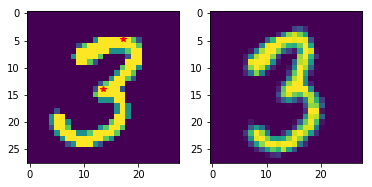

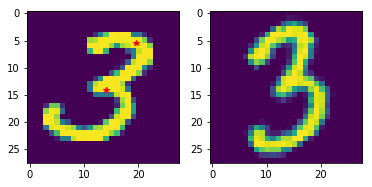

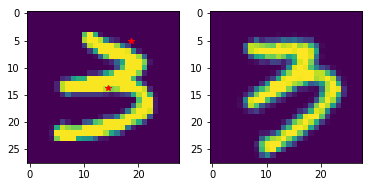

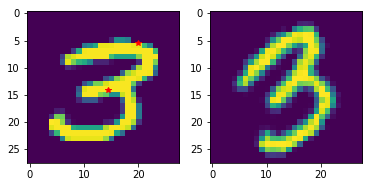

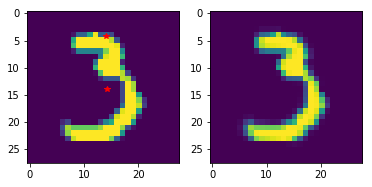

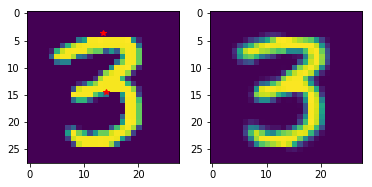

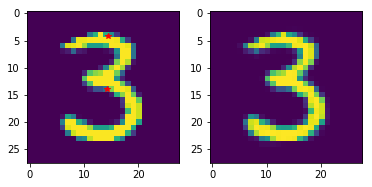

In [195]:
def img_to_coord_tensor(img, img_num, tensor_index):
    """
    Takes in a 4D image and returns the 3*W*H coordinate representation
    """
    _, _, height, width = img.shape
    flattened_img = torch.transpose(img[img_num, tensor_index], 0, 1).contiguous().view(width * height)
    x_coord = torch.arange(0, width).view(width, 1)
    x_coord = x_coord.expand(width, height).contiguous()
    x_coord = x_coord.view(width * height).float()

    y_coord = torch.arange(height, 0, -1)
    y_coord = y_coord.expand(width, height).contiguous()
    y_coord = y_coord.view(width * height).float()

    new_coord_matrix = np.vstack([x_coord.numpy(), y_coord.numpy()])
    img_tensor = torch.stack((x_coord, y_coord, flattened_img))

    return img_tensor

def weighted_pca(coord_mat):
    """
    Given three real-valued vectors of same length, corresponding to the coordinates
    and weight of a 2-dimensional dataset, this function outputs the angle in radians
    of the line that aligns with the (weighted) average and main linear component of
    the data. For that, first a weighted mean and covariance matrix are computed.
    Then u,e,v=svd(cov) is performed, and u * f(x)=0 is solved.
    """
    x_vec = coord_mat[0, :]
    y_vec = coord_mat[1, :]
    weights = coord_mat[2, :]
    weight_mat = torch.diag(weights)
    weights_sum = weights.sum()
    # Subtract (weighted) mean and compute (weighted) covariance matrix:
    eps = 0.0001
    weights_sum += eps
    mean_x, mean_y = torch.dot(weights, x_vec) / weights_sum, torch.dot(weights, y_vec) / weights_sum
    coord_mat[0, :] -= mean_x
    coord_mat[1, :] -= mean_y
    centered_mat = coord_mat[[0, 1], :]
    weighted_cov = torch.mm(centered_mat, torch.mm(weight_mat, torch.t(centered_mat) )) / weights_sum
    u,e,v = torch.svd(weighted_cov)
    eig_val = torch.sqrt(e)
    rotation = rot_mat(pi).float()
    print("U first vec:", u[:, 0])
    if u[1,0] < 0:
        u = torch.matmul(rotation, u)
#         pass
#         eig_val[0] = -1
#     else:
#         eig_val[0] = 1
    print("U:", u)
    scale_mat = torch.Tensor([[eig_val[0], 0], 
                              [0, eig_val[1]]])
#     rotation_mat = torch.stack([eig_val[0]**(-1)*u[:,0], eig_val[1]**(-1)*u[:,1]])
#     rotation_mat = torch.t(rotation_mat)
    return u, scale_mat, mean_x, mean_y


target_val = 3
for x in range(12):
    index = np.random.randint(2000)
    while y_train_mnist[index][0].numpy() != target_val:
        index = np.random.randint(2000)
#     index = 59
    print(index)
#     x_example1 = x_train_mnist[index]
#     x_example1 = x_train_mnist[index]
    x_example = x_train_mnist[index]
    x_batch = x_example.view(1, 1, 28, 28)
    padding = torch.zeros(1, 2, 28, 28)
    x_batch = torch.cat((x_batch, padding), 1)
    x_batch = compress(x_batch)
    print("XBATCH TYPE", type(x_batch))
    print("XBATCH SHAPE:", x_batch.shape)
    
    num_channels = x_batch.shape[0]
    theta = torch.zeros(num_channels, 2, 3)
    pi = 3.1415926535
    
    for channel_num in range(num_channels):
        x_batch_coord = img_to_coord_tensor(x_batch, channel_num, 0)
        

        rot, scale, mean_x, mean_y = weighted_pca(x_batch_coord)
        print(rot[0][1], rot[0][0])
        rot_lambda = torch.atan2(rot[0][1], rot[0][0])
#         print("LAMBDA:", np.degrees(rot_lambda))
        diff_angle = ((pi / 2) - rot_lambda)
#         print("DIFF LAMBDA:", np.degrees(diff_angle))


        rotation = rot_mat(diff_angle).float()

        theta[channel_num, :2, :2] = rotation
        print(rot, scale, mean_x, mean_y)

    fig, ax = plt.subplots(1, 2)
    
    print("THETA SHAPE:", theta.shape)

    grid = F.affine_grid(theta, x_batch.size())
    x = F.grid_sample(x_batch, grid)
    x = x.view(1, 28, 28)
    x = x.permute(1, 2, 0)
    print("Results Shape:", x[0].shape)
 
    x_batch = x_batch.view(1, 28, 28)
    x_batch = x_batch.permute(1, 2, 0)
    ax[0].imshow(x_batch[:, :, 0].data)
    ax[1].imshow(x[:,:,0].data)
#     ax[2].imshow(x[:,:,0].data)
    ax[0].plot(mean_x.data, mean_y.data, 'r*')
    ax[0].plot(mean_x.data+rot[0][0].data*10, x.data[0].shape[0] - (mean_y.data+rot.data[0][1]*10), 'r*')

In [709]:
class KernelCompress(torch.nn.Module):
    def __init__(self, in_channels):
        super(KernelCompress, self).__init__()
        self.conv2d = torch.nn.Conv2d(in_channels, 1, 1)   # hidden layer
        self.conv2d.weight = torch.nn.Parameter(torch.ones(1,in_channels,1,1))
        self.conv2d.bias = torch.nn.Parameter(torch.zeros(1))

    def forward(self, x):
        x = self.conv2d(x)
        return x


def rot_mat(theta):
    theta = torch.Tensor([theta])
    c, s = torch.cos(theta), torch.sin(theta)
    R = torch.Tensor(((c,-s), (s, c)))
    return R



class ShapeWhitening(torch.nn.Module):
    """
    PyTorch layer for applying shape whitening decomposition
    """
    
    def __init__(self):
        super(ShapeWhitening, self).__init__()
    
    def weighted_pca(self, coord_mat):
        """
        Given three real-valued vectors of same length, corresponding to the coordinates
        and weight of a 2-dimensional dataset, this function outputs the angle in radians
        of the line that aligns with the (weighted) average and main linear component of
        the data. For that, first a weighted mean and covariance matrix are computed.
        Then u,e,v=svd(cov) is performed, and u * f(x)=0 is solved.
        """
        col_nums = coord_mat.shape[1]
        
        x_vec = coord_mat[0, :]
        y_vec = coord_mat[1, :]
        weights = coord_mat[2, :]
        weight_mat = torch.diag(weights)
        weights_sum = weights.sum()
        # Subtract (weighted) mean and compute (weighted) covariance matrix:
        eps = 0.0001
        weights_sum = weights_sum + eps
        mean_x, mean_y = torch.dot(weights, x_vec) / weights_sum, torch.dot(weights, y_vec) / weights_sum
        
        mean_mat = torch.stack((mean_x*torch.ones(col_nums), mean_y*torch.ones(col_nums), torch.zeros(col_nums)))
        coord_mat = coord_mat - mean_mat
        centered_mat = coord_mat[[0, 1], :]
        weighted_cov = torch.mm(centered_mat, torch.mm(weight_mat, torch.t(centered_mat) )) / weights_sum
        u, e, v = torch.svd(weighted_cov)
        eig_val = torch.sqrt(e)
        rotation = rot_mat(pi).float()
 
        if u[1,0] < 0:
            u = torch.matmul(rotation, u)

        scale_mat = torch.Tensor([[eig_val[0], 0], 
                                  [0, eig_val[1]]])
        return u, scale_mat, mean_x, mean_y
    
    def img_to_coord_tensor(self, img, img_num, kernel_num):
        """
        Takes in a 4D image and returns the 3*W*H coordinate representation
        """
        _, _, height, width = img.shape
        flattened_img = torch.transpose(img[img_num, kernel_num], 0, 1).contiguous().view(width * height)
        x_coord = torch.arange(0, width).view(width, 1)
        x_coord = x_coord.expand(width, height).contiguous()
        x_coord = x_coord.view(width * height).float()

        y_coord = torch.arange(height, 0, -1)
        y_coord = y_coord.expand(width, height).contiguous()
        y_coord = y_coord.view(width * height).float()

        new_coord_matrix = np.vstack([x_coord.numpy(), y_coord.numpy()])
        coord_matrix = torch.stack((x_coord, y_coord, flattened_img))

        return coord_matrix

    def forward(self, img_tensor):
        img_num, channel_num, new_height, new_width = img_tensor.shape
        theta = torch.zeros(img_num, 2, 3)
        rotations = torch.ones(img_num, 1)
        Id_mat = torch.eye(img_num)
        
        pi = 3.141592653589793238462643383279
        compress = KernelCompress(channel_num)
        img_squashed = compress(img_tensor)

        for img_index in range(img_num):
            img_squashed_coord = self.img_to_coord_tensor(img_squashed, img_index, 0)

            rot, scale, mean_x, mean_y = self.weighted_pca(img_squashed_coord)
            rot_lambda = torch.atan2(rot[0][1], rot[0][0])
            diff_angle = ((pi / 2) - rot_lambda)

            rotation = rot_mat(diff_angle).float()
            print("ROTATION ANGLE", rotations*(360/(2*pi)))
            theta[img_index, :2, :2] = rotation
            rotations = rotations + Id_mat[img_index, :].view(img_num, 1)*diff_angle


        grid = F.affine_grid(theta, img_tensor.size())
        img_tensor = F.grid_sample(img_tensor, grid)
        return img_tensor, (rot, scale, mean_x, mean_y), rotations

623
ROTATION ANGLE tensor([[91.7324]], grad_fn=<MulBackward>)
397
ROTATION ANGLE tensor([[86.3567]], grad_fn=<MulBackward>)
1425
ROTATION ANGLE tensor([[87.8152]], grad_fn=<MulBackward>)
1873
ROTATION ANGLE tensor([[90.9655]], grad_fn=<MulBackward>)
1128
ROTATION ANGLE tensor([[59.1283]], grad_fn=<MulBackward>)
723
ROTATION ANGLE tensor([[87.0959]], grad_fn=<MulBackward>)
147
ROTATION ANGLE tensor([[62.2215]], grad_fn=<MulBackward>)
1748
ROTATION ANGLE tensor([[42.7156]], grad_fn=<MulBackward>)
1406
ROTATION ANGLE tensor([[52.3229]], grad_fn=<MulBackward>)
922
ROTATION ANGLE tensor([[62.2518]], grad_fn=<MulBackward>)


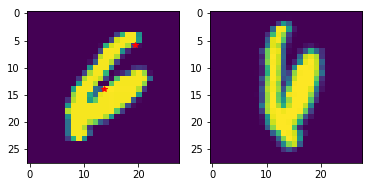

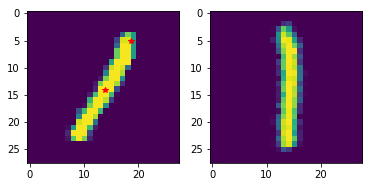

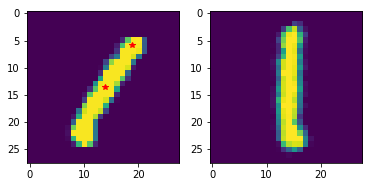

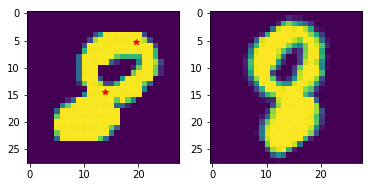

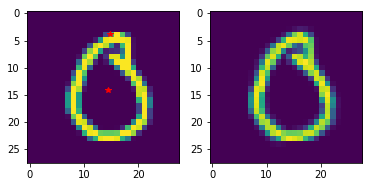

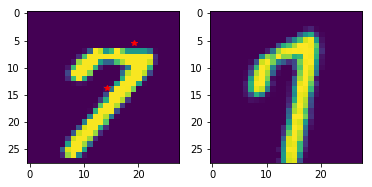

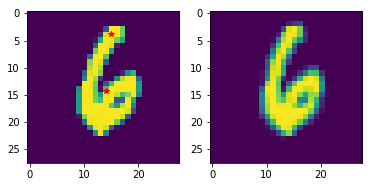

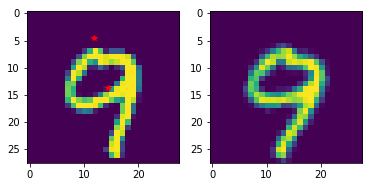

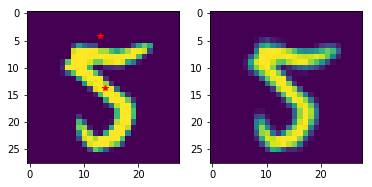

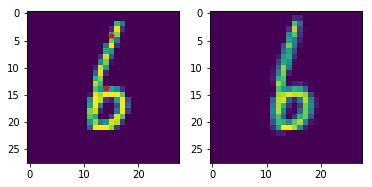

In [730]:
shape_whitening = ShapeWhitening()

# print(index)

def plot_transform(py_tensor, ax1=None, ax2=None):
#     py_tensor = py_tensor.clone()
#     py_tensor = py_tensor.view(28, 28)
    ax = None
    if ax1 is None:
        fig, ax = plt.subplots(1, 2)
        ax1 = ax[0]
        ax2 = ax[1]
    x_batch = py_tensor
#     print(x_batch.shape)
    x_batch_transform, (rot, scale, mean_x, mean_y), rotations = shape_whitening(x_batch)
#     print(rotations)
#     print(rot, scale, mean_x, mean_y)

    x_batch_transform_numpy = x_batch_transform.view(1, 28, 28).data
    x_batch_transform_numpy = x_batch_transform_numpy.permute(1, 2, 0)
    x_batch_transform_numpy = x_batch_transform_numpy.numpy()

    x_batch_numpy = x_batch.view(1, 28, 28).data
    x_batch_numpy = x_batch_numpy.permute(1, 2, 0)
    x_batch_numpy = x_batch_numpy.numpy()

    
    ax1.imshow(x_batch_numpy[:, :, 0])
    ax1.plot(mean_x.data, mean_y.data, 'r*')
    ax1.plot(mean_x.data+rot[0][0].data*10, x_batch_numpy.data.shape[0] - (mean_y.data+rot.data[0][1]*10), 'r*')
    
    ax2.imshow(x_batch_transform_numpy[:, :, 0])
    
    if ax is None:
        return ax

# plot_transform(x_example.view(1,1,28,28))
for x in range(10):
    index = np.random.randint(2000)
    print(index)
    x_example = x_train_mnist[index]
    plot_transform(x_example.view(1,1,28,28))
# fig, ax = plt.subplots(1)
# ax.imshow(test_img.view(28,28))

In [753]:
import torch.nn as nn
img_shape = (28, 28)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(int(img_shape[1]/4)*int(img_shape[0]/4)*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return F.softmax(out, dim=0)
        
class SWCNN(nn.Module):
    def __init__(self):
        super(SWCNN, self).__init__()
        self.shape_whitening = ShapeWhitening()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(int(img_shape[1]/4)*int(img_shape[0]/4)*32, 10)
        self.fc2 = nn.Linear(11, 10)
        
    def forward(self, x):
        
        out = self.layer1(x)
        out, _, rot = self.shape_whitening(out) 
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
#         print("TENSOR SHAPES:", out.shape)
#         print(rot.shape)
#         out = torch.cat((out, rot), 1)
#         out = self.fc2(out)

        return F.softmax(out, dim=0)

In [754]:
def train_net(model, data_loader, loss_function, optimizer_function, num_epochs=10, num_examples = 10):
    # Train the Model
    for epoch in range(num_epochs):
        for i, batch in enumerate(data_loader):
            if i >= num_examples:
                print("Batch Num", i*epoch)
                break
            input_data = Variable(batch[0].float()/batch[0].max())
            temp_labels = Variable(batch[1].long().squeeze(1))
            # Forward + Backward + Optimize
            optimizer_function.zero_grad()
            outputs = model(input_data)

            loss = loss_function(outputs, temp_labels)
            loss.backward()
            optimizer_function.step()

In [755]:
cnn = CNN()
swcnn = SWCNN()
learning_rate = 0.001
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
criterion2 = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)
optimizer2 = torch.optim.Adam(swcnn.parameters(), lr=learning_rate)

In [757]:
train_net(cnn, train_loader, criterion, optimizer, 10, 10)
train_net(swcnn, train_loader, criterion2, optimizer2, 10, 10)
print("DONE!")

Batch Num 0
Batch Num 10
Batch Num 20
Batch Num 30
Batch Num 40
Batch Num 50
Batch Num 60
Batch Num 70
Batch Num 80
Batch Num 90
Batch Num 0
Batch Num 10
Batch Num 20
Batch Num 30
Batch Num 40
Batch Num 50
Batch Num 60
Batch Num 70
Batch Num 80
Batch Num 90
DONE!


LABEL CNN ROTATION
ROTATION ANGLE tensor([[52.7136]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[61.1543]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[43.0809]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[53.1701]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[76.4064]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[64.0067]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[61.2661]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[45.7787]], grad_fn=<MulBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


ROTATION ANGLE tensor([[43.1653]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[64.2425]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[70.7670]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[84.8948]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[63.6597]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[15.7119]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[86.8988]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[30.8019]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[67.8825]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[79.0997]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[18.2551]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[41.0142]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[54.7139]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[29.5392]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[38.5120]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[64.3235]], grad_fn=<MulBackward>)
ROTATION ANGLE tensor([[82.9155]], grad_fn=<MulBackward>)
ROTATION ANGLE

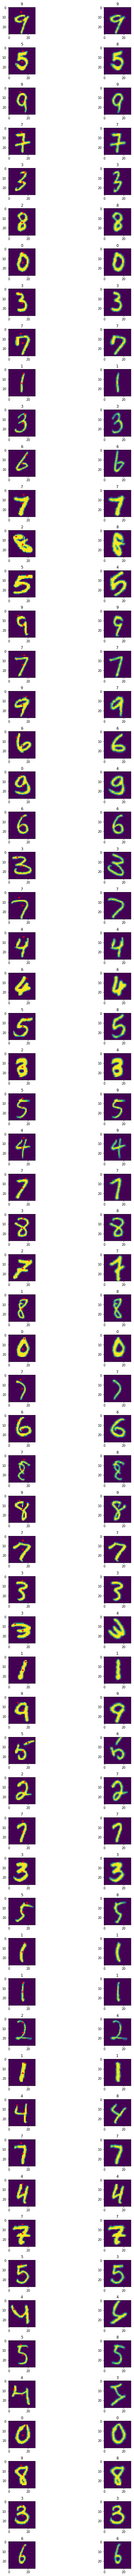

In [737]:
num_limit = 1
total_num = 64
fig, ax = plt.subplots(64,2, figsize=(10,150))
count = 0
specific_batch = np.random.randint(50)

shape_whitening = ShapeWhitening()

print("LABEL", "CNN", "ROTATION")
for index, batch in enumerate(test_loader):
    if index != specific_batch:
        continue
    for index2, (img, label) in enumerate(zip(batch[0],batch[1])):
        if index2 >= total_num:
            break
        img2 = img.clone()
        img = img.view(1, 1,img_shape[1],img_shape[0])
        test_img = Variable(img.float()/img.max())
        test_img2 = Variable(img2.view(1, 1,img_shape[1],img_shape[0]).float()/img2.max())
        
        outputs = cnn(test_img.clone())
        _, prediction = torch.max(outputs.data, 1)
        
        outputs2 = swcnn(test_img.clone())
        _, prediction2 = torch.max(outputs2.data, 1)
    
        
        digit_num = int(prediction[0])
        digit_num2 = int(prediction2[0])

        ax[count, 0].set_title(digit_num)
        ax[count, 1].set_title(digit_num2)
        test_img2
        plot_transform(test_img2, ax[count, 0], ax[count, 1])
        count += 1
        
        
plt.subplots_adjust(hspace=0.5)
plt.show()

In [751]:
# Test the Model
cnn.eval()  # Change model to 'eval' mode (BN uses moving mean/var).
swcnn.eval()  # Change model to 'eval' mode (BN uses moving mean/var).
correct = 0
total = 0

correct2 = 0
total2 = 0

num_imgs = 100
count = 0
for testing_images, testing_labels in test_loader:
    for image, label in zip(testing_images, testing_labels):
        if count >= num_imgs:
            break
        count += 1
        t_label = label.long()
        t_image = Variable(image.view(1, 1, img_shape[1], img_shape[0]).float())
        t_image2 = t_image.clone()
        t_label2 = t_label.clone()

        outputs2 = swcnn(t_image2)
        _, predicted2 = torch.max(outputs2.data, 1)
        total2 += t_label2.size(0)
        correct2 += (predicted2 == t_label2).sum()
        
        outputs = cnn(t_image)
        _, predicted = torch.max(outputs.data, 1)
        total += t_label.size(0)
        correct += (predicted == t_label).sum()

print('Test Accuracy of the CNN on the {} images {}'.format(num_imgs, 100 * correct / num_imgs))
print('Test Accuracy of the RotationCNN on the {} images {}'.format(num_imgs, 100 * correct2 / num_imgs))


# Save the Trained Model
# torch.save(cnn.state_dict(), 'cnn.pkl')

Test Accuracy of the CNN on the 100 images 8
Test Accuracy of the RotationCNN on the 100 images 8


In [676]:

print(B)
print(B.shape)

torch.Size([5, 1])
tensor([[6.],
        [1.],
        [1.],
        [1.],
        [1.]])
torch.Size([5, 1])


In [703]:
a = torch.stack((torch.ones(5), torch.ones(5), torch.zeros(5)))
a

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.]])